In [1]:
%matplotlib inline
from pprint import pprint
from decimal import Decimal
import itertools
import metrics
import pandas

import simulate
import harvesting
import market
import withdrawal
import numpy

In [2]:
import seaborn
from matplotlib import pyplot as plt
import matplotlib
seaborn.set(style="whitegrid")
seaborn.set_context('poster')

/Users/justus/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
series = market.Returns_US_1871()

In [4]:
TYPE = 'Withdrawal (Real)'
m = {'Withdrawal (Nominal)': lambda x: float(x.withdraw_n),
     'Withdrawal (Real)' : lambda x: float(x.withdraw_r),
     'Portfolio (Nominal)': lambda x: float(x.portfolio_n),
     'Portfolio (Real)': lambda x: float(x.portfolio_r),
}
lens = m[TYPE]
lens.__label__ = TYPE

def fn(x):
    return [lens(_) for _ in x]

In [5]:
VPW_YEARS=40

def run_sim(year, key, length=30):
    w = {
        'raw' : lambda p, s: withdrawal.VPW(p, s, years_left=VPW_YEARS),
        'cape10' : lambda p, s: withdrawal.CAPE10Smoothing(year, withdrawal.VPW(p, s, years_left=VPW_YEARS)),
    }

    portfolio = (500000,500000)
    harvest_strategy = harvesting.make_rebalancer(0.5)
    
    return simulate.withdrawals(series.iter_from(year),
                                 withdraw=w[key],
                                 years=length,
                                 portfolio=portfolio,
                                 harvesting=harvest_strategy)

In [6]:
def chart_one(year):
    pmt = run_sim(year, 'raw')
    cape10 = run_sim(year, 'cape10')
    
    df = pandas.DataFrame({
        'pmt' : [lens(x) for x in pmt],
        'cape' : [lens(x) for x in cape10],
    })
    g = seaborn.relplot(
            data=df,
            kind='line',
            aspect=2,
        )
    g.fig.autofmt_xdate()
    g.despine(left=True, bottom=True, offset=20)
    g.fig.suptitle(f'Retirement in {year}')
    return g

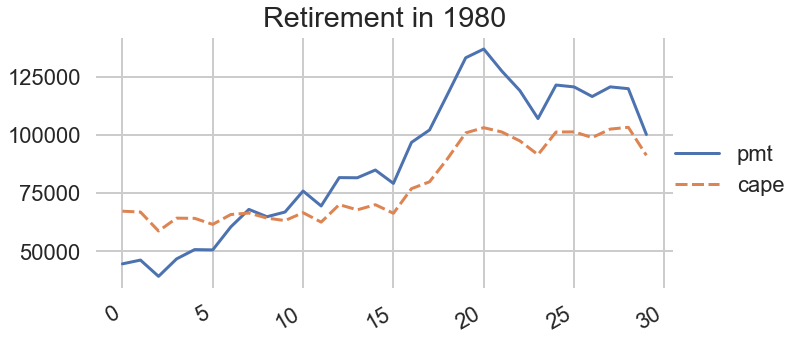

In [7]:
chart_one(1980)

In [24]:
def run_all():
    length = 30
    
    all = pandas.DataFrame(index=range(1881, 2018-length+1), columns=['pmt', 'cape'])
    
    for i in range(1881, 2018-length+1):
        pmt = run_sim(i, 'raw', length=length)
        cape10 = run_sim(i, 'cape10', length=length)
        
        df = pandas.DataFrame({
            'pmt' : [lens(x) for x in pmt],
            'cape' : [lens(x) for x in cape10]
        })
        
        all.loc[i]['pmt'] = df['pmt'].std()
        all.loc[i]['cape'] = df['cape'].std()

        return all

In [25]:
df = run_all()
df.head()

,pmt,cape
1881,8927.31,6452.48
1882,NaN,NaN
1883,NaN,NaN
1884,NaN,NaN
1885,NaN,NaN


Text(0.5, 0.98, 'stdev of retirement income')

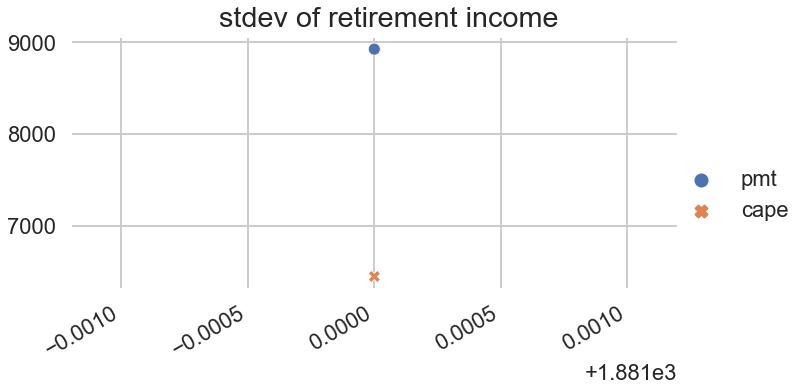

In [10]:
g = seaborn.relplot(
        data=df,
#        kind='line',
        aspect=2,
    )
g.fig.autofmt_xdate()
g.despine(left=True, bottom=True, offset=20)
g.fig.suptitle(f'stdev of retirement income')

In [11]:
df.mean()

pmt     8927.314415
cape    6452.479711
dtype: float64

In [12]:
df.median()

pmt     8927.314415
cape    6452.479711
dtype: float64

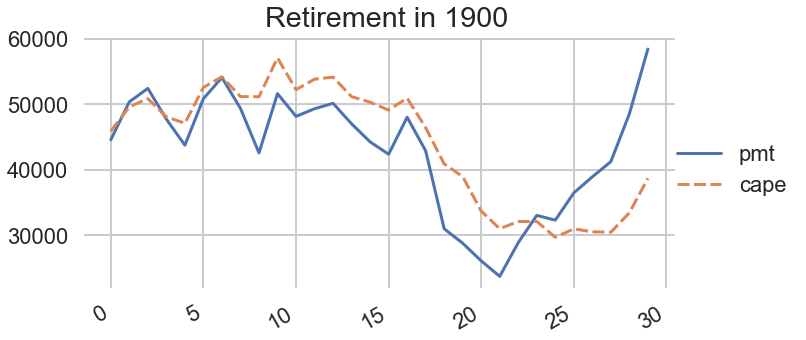

In [13]:
chart_one(1900)

In [14]:
len(df[df['cape'] < df['pmt']])

1

In [20]:
def run_all():
    length = 5
    
    all = pandas.DataFrame(index=range(1881, 2018-length+1), columns=['pmt', 'cape'])
    
    for i in range(1881, 2018-length+1):
        pmt = run_sim(i, 'raw', length=length)
        cape10 = run_sim(i, 'cape10', length=length)
        
        df = pandas.DataFrame({
            'pmt' : [lens(x) for x in pmt],
            'cape' : [lens(x) for x in cape10]
        })
        
        all.loc[i]['pmt'] = metrics.ulcer(df['pmt'][0:5])
        all.loc[i]['cape'] = metrics.ulcer(df['cape'][0:5])
        
    return all

In [21]:
df = run_all()

IndexError: single positional indexer is out-of-bounds

In [ ]:
g = seaborn.relplot(
        data=df,
#        kind='line',
        aspect=3,
    )
g.fig.autofmt_xdate()
g.despine(left=True, bottom=True, offset=20)
g.fig.suptitle(f'Ulcer Index of Income (First 5 years)')

In [ ]:
(df['cape'] - df['pmt']).sort_values(ascending=False).head()

In [19]:
u = df['cape'] - df['pmt']
u[u > 0].mean()

nan

In [22]:
def run_all():
    length = 15
    
    all = pandas.DataFrame(index=range(1881, 2018-length+1), columns=['pmt', 'cape'])
    
    for i in range(1881, 2018-length+1):
        pmt = run_sim(i, 'raw', length=length)
        cape10 = run_sim(i, 'cape10', length=length)
        
        df = pandas.DataFrame({
            'pmt' : [lens(x) for x in pmt],
            'cape' : [lens(x) for x in cape10]
        })
        
        all.loc[i]['pmt'] = Decimal(df['pmt'][0]) / metrics.cew(df['pmt'].apply(Decimal))
        all.loc[i]['cape'] = Decimal(df['cape'][0]) / metrics.cew(df['cape'].apply(Decimal))
        
    return all

In [23]:
df = run_all()

IndexError: single positional indexer is out-of-bounds

In [ ]:
df['cape'].sort_values(ascending=False).head()

In [ ]:
df['pmt'].sort_values(ascending=False).head()

In [ ]:
chart_one(1966)

In [ ]:
chart_one(1966)

In [ ]:
df.median()

In [ ]:
df.mean()

In [ ]:
cape10_csv = pandas.read_csv('1871_returns.csv', usecols=['Year', 'CAPE10'], index_col='Year')

In [ ]:
df['CAPE10'] = cape10_csv['CAPE10']

In [ ]:
df.sort_values(by='CAPE10', ascending=False).head()

In [ ]:
df.loc[1998]

In [ ]:
chart_one(1998)